In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib as ml

%matplotlib inline

In [31]:
plate = cv2.imread('DATA/car_plate.jpg')
plate = cv2.cvtColor(plate, cv2.COLOR_BGR2RGB)
plate_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [48]:
def display(img,cmap='gray'):
    ax = plt.figure(figsize=(10,40))
    plt.subplot(111)
    plt.imshow(img,cmap=cmap)

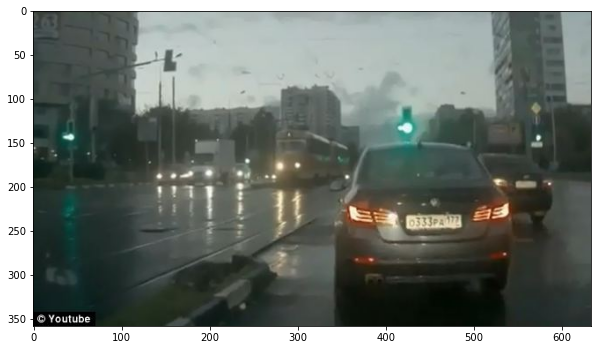

In [49]:
display(plate)

In [43]:
def detect_plate(img):

    plate_cas_obj = plate_cascade.detectMultiScale(img, 1.2, 5)
        
    return plate_cas_obj

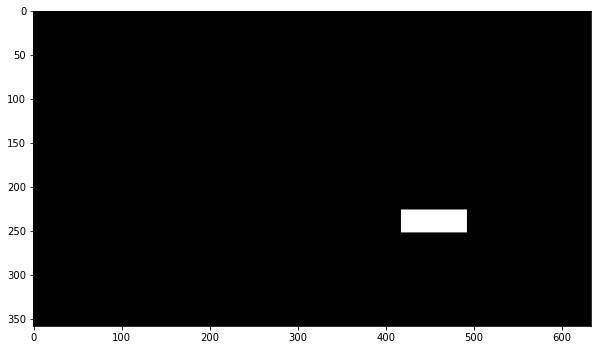

In [52]:
mask = np.zeros(plate.shape[:2])
plate_cas_obj = detect_plate(plate)

for (x, y, w, h) in plate_cas_obj:
    mask = cv2.rectangle(mask, (x,y), (x+w,y+h), (255,255,255), -1)
display(mask)

In [98]:
plate_output = plate.copy()
plate_gauss = cv2.GaussianBlur(plate_output, (9,9) , 5, 5)
plate_gauss.shape

(358, 634, 3)

In [99]:
mask3D = np.repeat(mask[:,:,np.newaxis],3,axis=2)
mask3D.shape

(358, 634, 3)

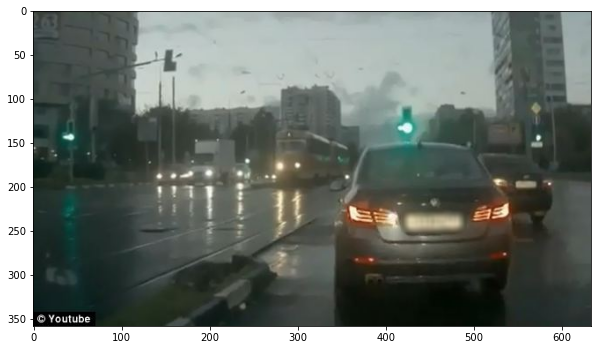

In [100]:
plate_output[mask3D==255] = plate_gauss[mask3D==255]
display(plate_output)